In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import random 

Os arquivos devem ser baixados da Justiça Eleitoral:
https://dadosabertos.tse.jus.br/dataset/resultados-2022-arquivos-transmitidos-para-totalizacao

Executando o script logjez_process.py arquivos CSV serão gerados para cada estado dois arquivos, um com votos e outro com dados das urnas.

Vamos carregar a tabela de cidades. Só será utilizada para informar o nome da cidade de acordo com o código

In [3]:
municipios = pd.read_csv("./municipios.csv", encoding="iso-8859-1")
municipios.sample(10)

,municipio_cod,municipio,estado
5005,63959,ECHAPORÃÂ,SP
4856,61700,RIBEIRÃÂO GRANDE,SP
337,35092,ENTRE RIOS,BA
4282,88382,ITAARA,RS
5448,73172,NOVO JARDIM,TO
4652,82872,RIO DO OESTE,SC
3622,58297,CORDEIRO,RJ
3501,78395,SANTA AMÃÂLIA,PR
1690,44318,DIAMANTINA,MG
2282,89834,PARANATINGA,MT


Vamos carregar os dados das urnas

In [4]:
path = "./csv_gerados/??.urnas.csv"
filenames = glob.glob(path)
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, encoding = "ISO-8859-1"))

urnas = pd.concat(dfs, ignore_index=True).dropna()

In [5]:
urnas.sample(10)

,UF,municipio,zona,secao,qtdEleitoresAptos,qtdComparecimento,dataHoraAbertura,dataHoraEncerramento,idPleito,qtdEleitoresLibCodigo,qtdEleitoresCompBiometrico,modelo
385625,SP,64254,291,54,234,169,20221030T080001,20221030T170050,407,5,132,UE2020
322655,RS,89354,110,27,406,287,20221030T080001,20221030T170148,407,28,233,UE2015
262324,PR,75353,1,722,289,237,20221030T080001,20221030T170048,407,13,228,UE2020
208519,PB,21172,28,68,285,244,20221030T080001,20221030T170117,407,13,242,UE2013
421946,SP,71072,2,125,231,162,20221030T080001,20221030T170651,407,17,120,UE2010
185860,MT,90697,7,34,396,301,20221030T070001,20221030T160124,407,17,278,UE2011
349924,SC,80896,98,65,324,273,20221030T080001,20221030T170211,407,19,238,UE2020
316853,RR,3018,5,671,161,121,20221030T070135,20221030T160021,407,4,48,UE2020
381613,SP,65455,201,475,385,314,20221030T080001,20221030T170127,407,22,311,UE2015
201399,PA,4154,43,861,388,329,20221030T080001,20221030T170050,407,14,310,UE2020


In [6]:
urnas.shape[0]

471984

Aqui carregamos os arquivo com os votos.

In [7]:
path = "./csv_gerados/??.votos.csv"
filenames = glob.glob(path)
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, encoding = "ISO-8859-1"))

votos = pd.concat(dfs, ignore_index=True).dropna()

In [8]:
votos.sample(10)

,UF,municipio,zona,secao,cargo,quantidadeVotos,partido,candidato
421772,MA,7528,75,79,presidente,112,22,22
969381,PR,74934,143,438,presidente,8,nulo,nulo
1099896,RJ,60011,25,978,presidente,230,22,22
1026573,PR,75353,177,368,presidente,6,branco,branco
573312,MG,51438,245,77,presidente,18,nulo,nulo
936499,PI,12190,97,446,presidente,87,22,22
555909,MG,50911,321,241,presidente,4,nulo,nulo
1638517,SP,71072,381,241,presidente,88,22,22
1017025,PR,75655,69,49,presidente,3,nulo,nulo
884959,PE,23817,41,65,presidente,214,13,13


In [9]:
votos.shape[0]

1851420

Precisamos uma tabela com 2 colunas com totais de votos para os candidatos Bolsonaro e Lula

In [10]:
votosBolsonaro = votos.query("candidato == '22'")
votosLula = votos.query("candidato == '13'")

In [11]:
votosBolsonaro = votosBolsonaro.rename(columns={"quantidadeVotos":"Bolsonaro"})
votosLula = votosLula.rename(columns={"quantidadeVotos":"Lula"})

Aqui juntamos os dados com votos dos 2 candidatos e o modelo de urna

In [12]:
votosPresidente = votosBolsonaro[['UF','municipio','zona','secao','Bolsonaro']].join(
    votosLula[['UF','municipio','zona','secao','Lula']]
        .set_index(['UF','municipio','zona','secao']), how="outer",
            on=['UF','municipio','zona','secao']).join(
                urnas[['UF','municipio','zona','secao','modelo']]
                    .set_index(['UF','municipio','zona','secao']), 
                        on=['UF','municipio','zona','secao']
            )

In [13]:
votosPresidente.head(10)

,UF,municipio,zona,secao,Bolsonaro,Lula,modelo
1,AC,1015,2,88,84.0,53.0,UE2009
5,AC,1015,2,75,129.0,47.0,UE2009
7,AC,1015,2,69,125.0,53.0,UE2009
11,AC,1015,2,95,133.0,34.0,UE2009
14,AC,1015,2,90,144.0,47.0,UE2009
18,AC,1015,2,73,138.0,45.0,UE2009
22,AC,1015,2,74,129.0,48.0,UE2009
24,AC,1015,2,67,164.0,53.0,UE2009
28,AC,1015,2,80,124.0,98.0,UE2009
32,AC,1015,2,66,162.0,56.0,UE2009


In [14]:
votosPresidente.shape

(471525, 7)

O foco aqui é validar a suspeita de 1 modelo das urnas ter comportamento na totalização de votos, portanto devemos começar analizando como foram distribuidas as urnas, pelo menos por estado, para diminuir a probabiliade de o fator demografico determinar a diferença.

Text(0.5, 1.0, 'Tipo de Urna Por Estado')

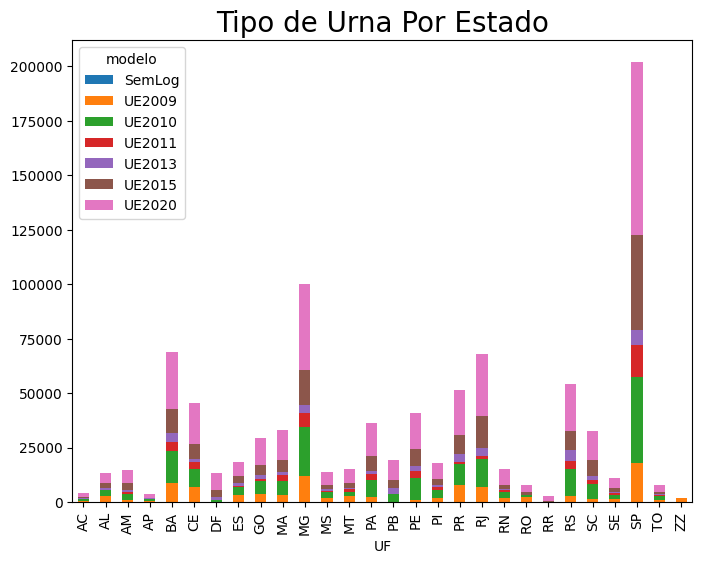

In [15]:
urnasPorUF = pd.pivot_table(data=votosPresidente[['UF','modelo']], index=['UF'], columns=['modelo'], aggfunc=np.count_nonzero)
ax = urnasPorUF.plot.bar(stacked=True, figsize=(8,6))
ax.set_title('Tipo de Urna Por Estado', fontsize=20)

Acima vemos a distribuição. Notem que haviam urnas que não encontramos o arquivo de log (SemLog). 
<br>O gráfico mostra que as urnas foram distribuidas em todos os estados. Em especial o modelo mais novo que representa uma boa quantidade das urnas para cada estado (em rosa)

Os graficos abaixo mostram a distribuição de votos apurados nas urnas UE2020 e o contraste para as não UE2020 (anteriores a 2020 que não foram auditadas no pleito de 2022)

C:\Users\coelh\AppData\Local\Temp\ipykernel_36280\2442136202.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmax' will be ignored
  plt.scatter(data['Bolsonaro'],data['Lula'], s=1, vmax=200)


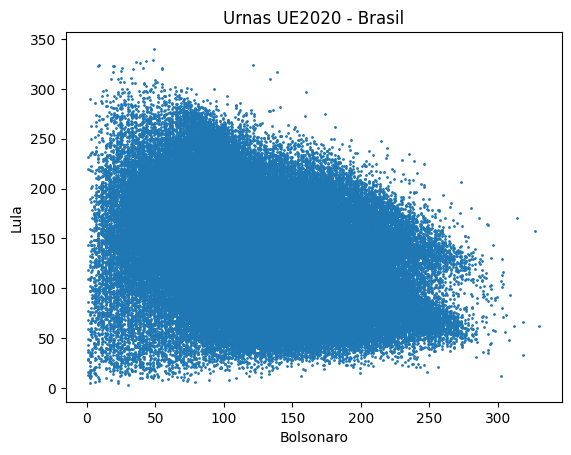

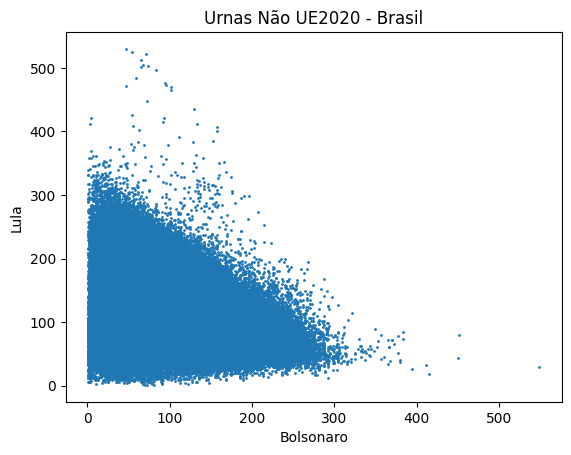

In [16]:
data = votosPresidente.query("modelo == 'UE2020'")
plt.scatter(data['Bolsonaro'],data['Lula'], s=1, vmax=200)
plt.title("Urnas UE2020 - Brasil")
plt.xlabel("Bolsonaro")
plt.ylabel("Lula")
plt.show()

data = votosPresidente.query("modelo != 'UE2020'")
plt.scatter(data['Bolsonaro'],data['Lula'], s=1)
plt.title("Urnas Não UE2020 - Brasil")
plt.xlabel("Bolsonaro")
plt.ylabel("Lula")
plt.show()

Os gráficos já mostram acima que o comportamento é muito distinto. As urnas mais antigas deram mais vantagem ao cadidato Lula, aparentemente retirando votos do Bolsonaro. 
<p>No gráfico das 2020 aparece um grande numero de votos mais ao centro, enquanto as antigas parecem ter algum tipo de trava, o que gera uma linha geometrica, quase igual um triângulo escaleno.

Vamos ver os mesmos gráficos para cada tipo de urna.
<p><i>* note que existem 3 populações maiores de urnas, as UE2010, UE2015 e UE2020. Os demais modelos são minoria, o que pode dificultar essa análise de um ponto de vista geometrico</i>

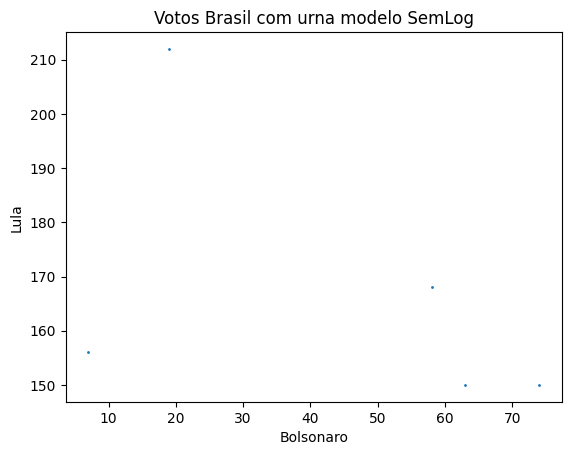

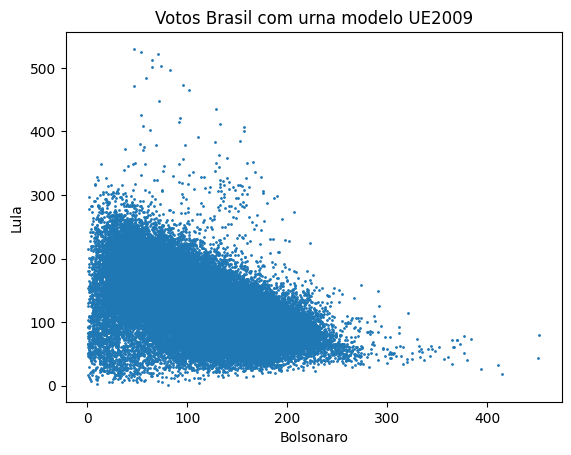

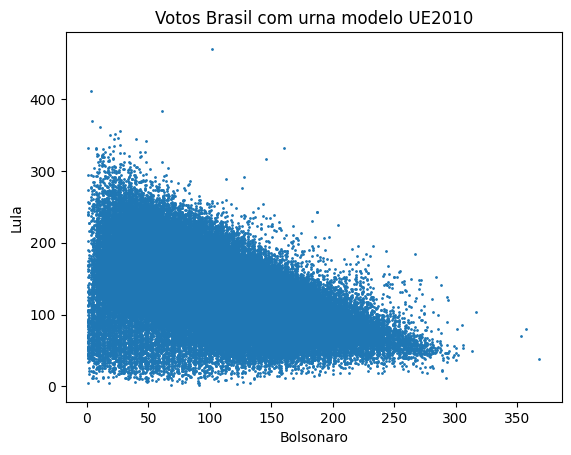

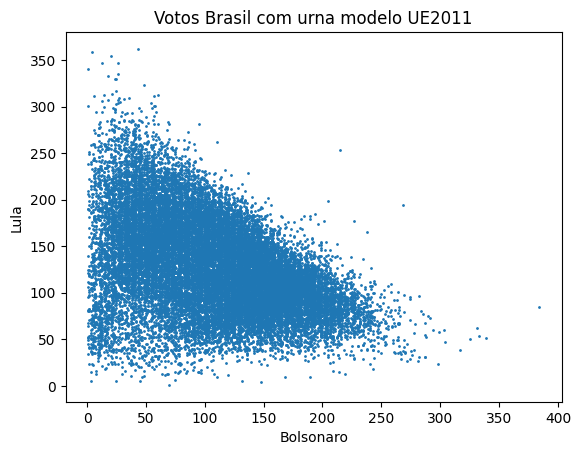

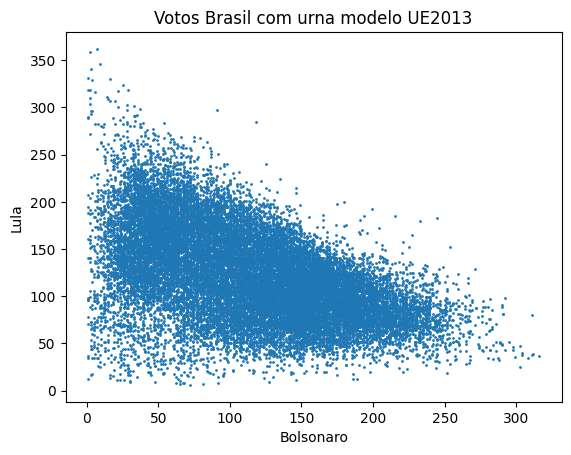

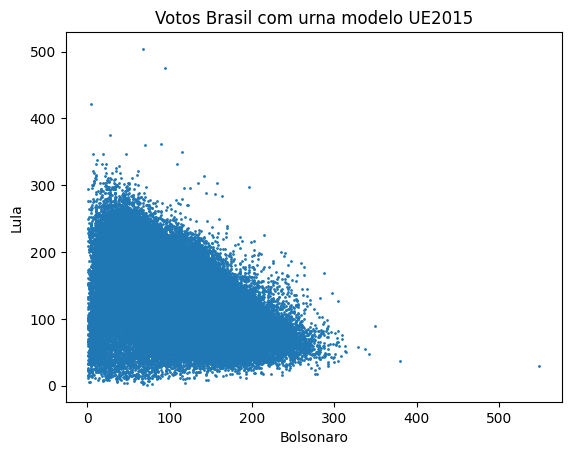

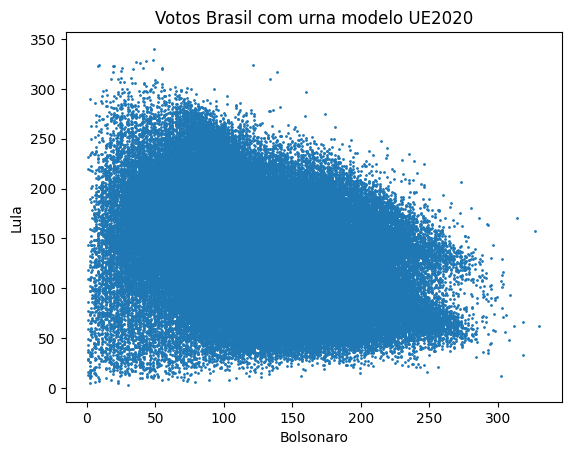

In [17]:
for index, row in votosPresidente.filter(['modelo'], axis=1).drop_duplicates().sort_values("modelo").iterrows():
    data = votosPresidente.query("modelo == '"+row['modelo']+"'")
    plt.scatter(data['Bolsonaro'],data['Lula'], s=1)
    plt.title("Votos Brasil com urna modelo "+row["modelo"])
    plt.xlabel("Bolsonaro")
    plt.ylabel("Lula")
    plt.show()


Revise os gráficos acima e note como é possível notar o tal triângulo escaleno em todos modelos, menos no modelo UE2020 onde, apesar de visualizarmos o triângulo, há um escape (massa da votos) mais distribuida ao centro.
<p>Isso pode indicar algumas possiveis causas
<li>Algum algorítmo foi criado para travar os votos, migrando de outro candidato para o candidato 13
<li>Seria improvável os mesmos eleitores, nos mesmos locais, terem comportamento tão diferenciado
<li>As urnas tem diferença no software, e o software foi adulterado
<p><B>Porém o mais provável é que a dispersão seja por conta de urnas com mais eleitores (vamos analisar abaixo), o que seria natural</B>

Aqui vamos explorar as urnas UE2020 e não UE2020 por cada estado

AC


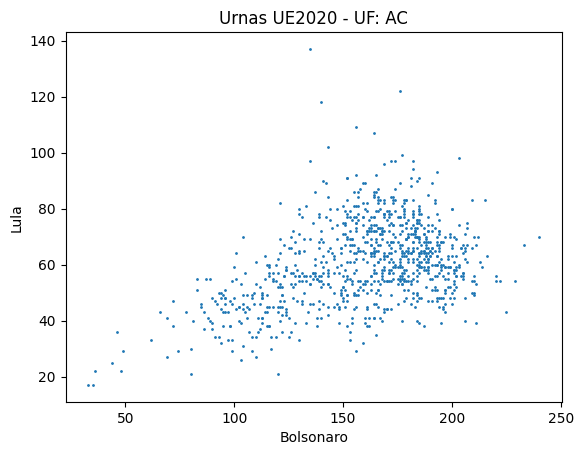

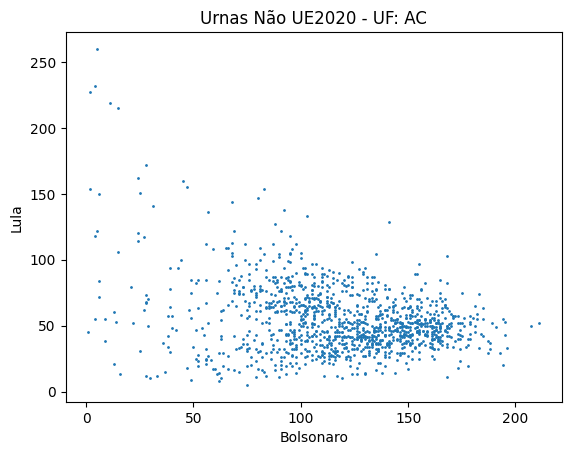

AL


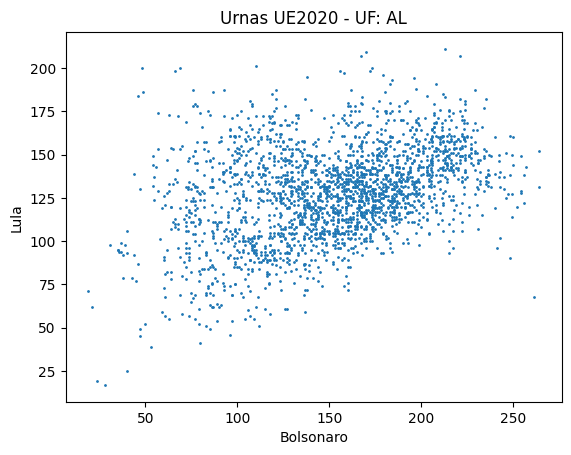

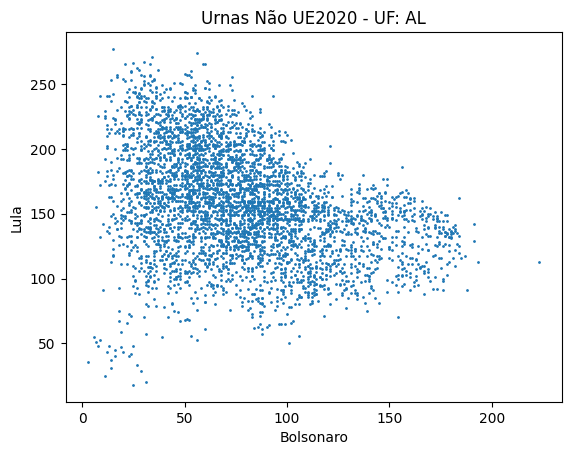

AM


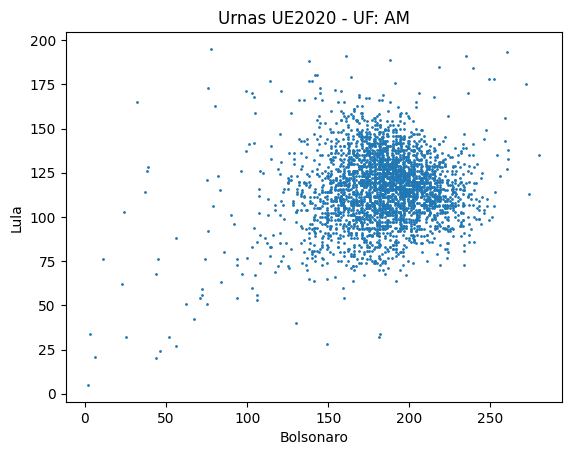

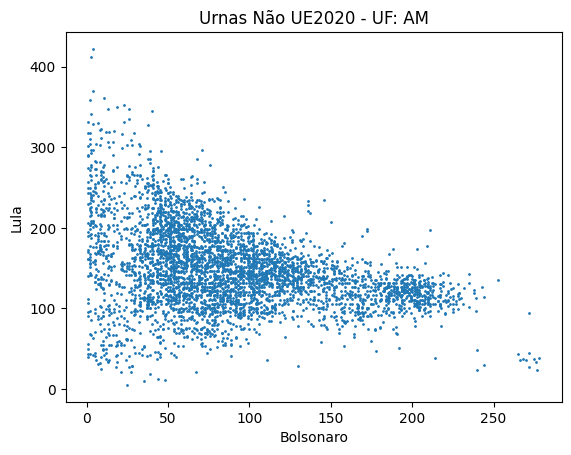

AP


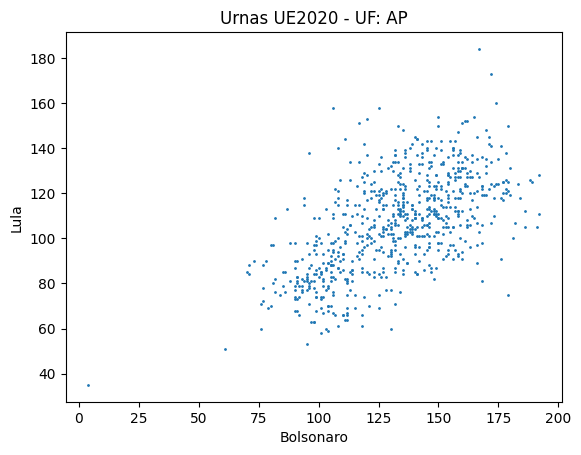

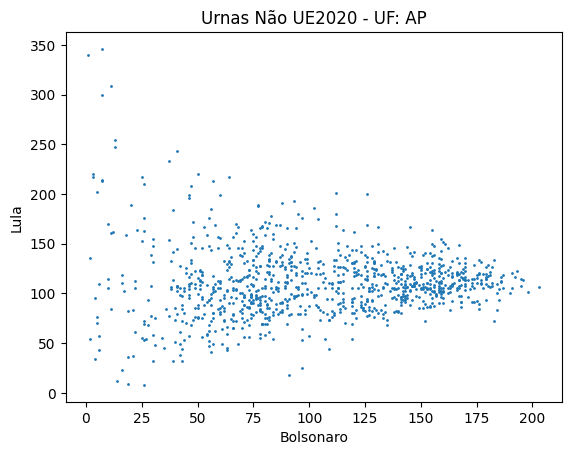

BA


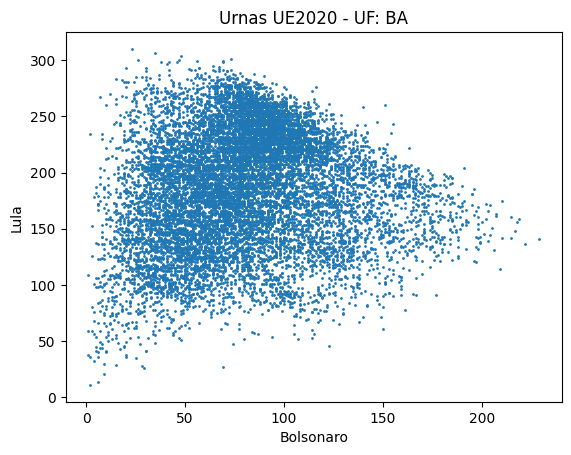

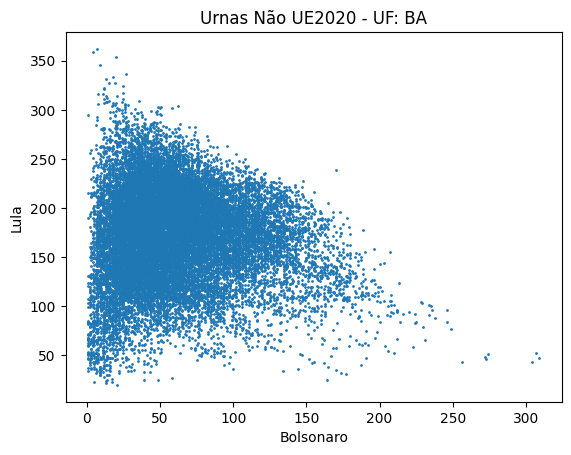

CE


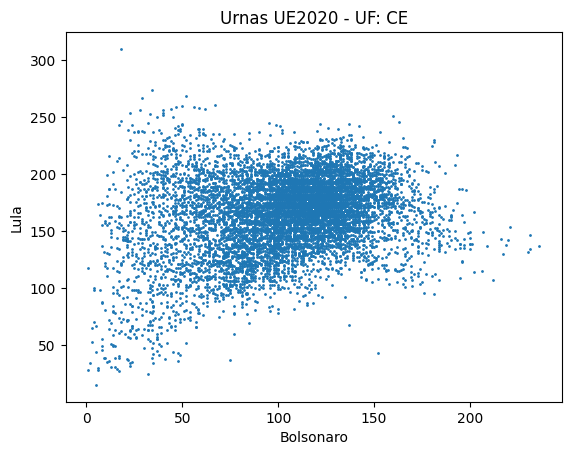

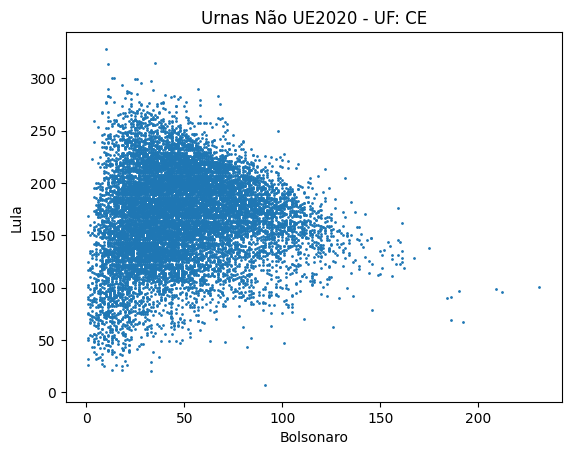

DF


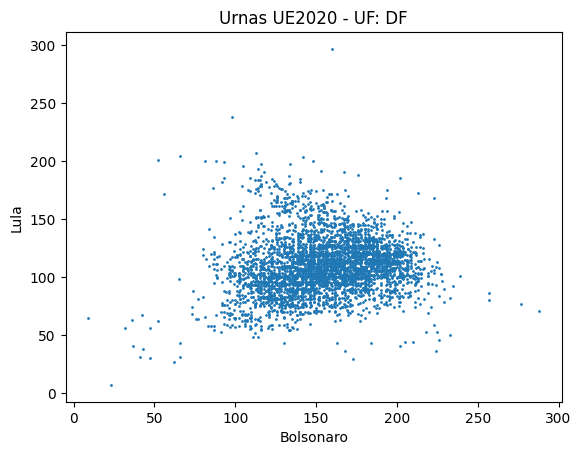

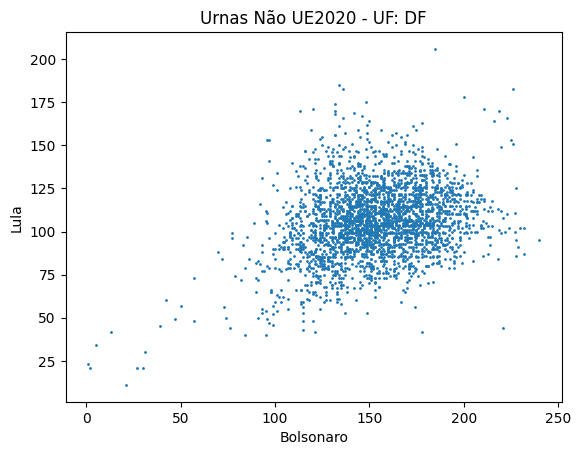

ES


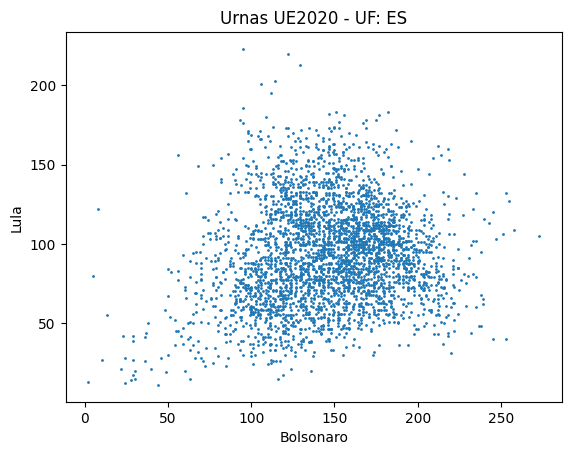

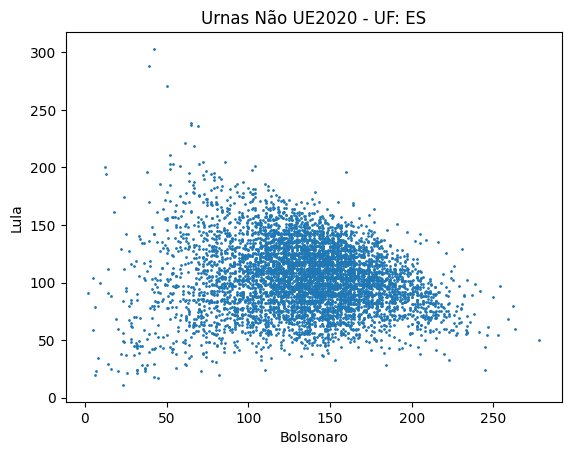

GO


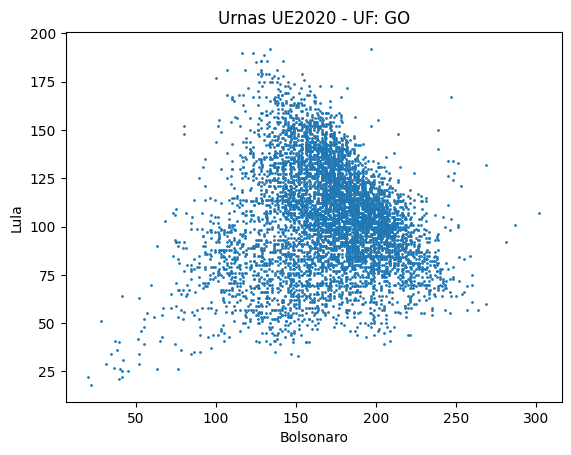

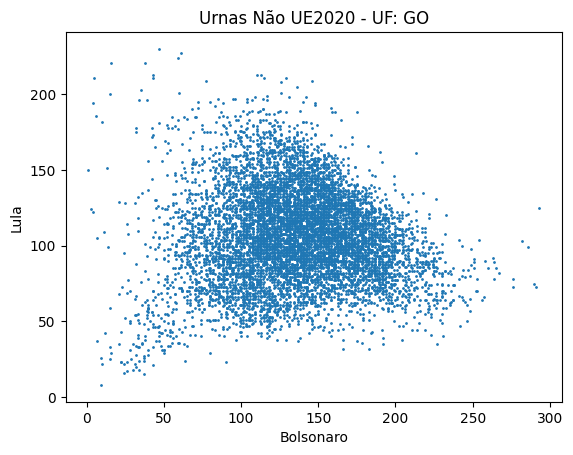

MA


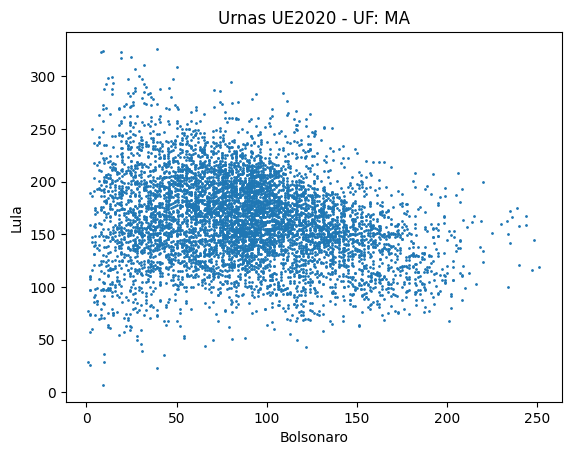

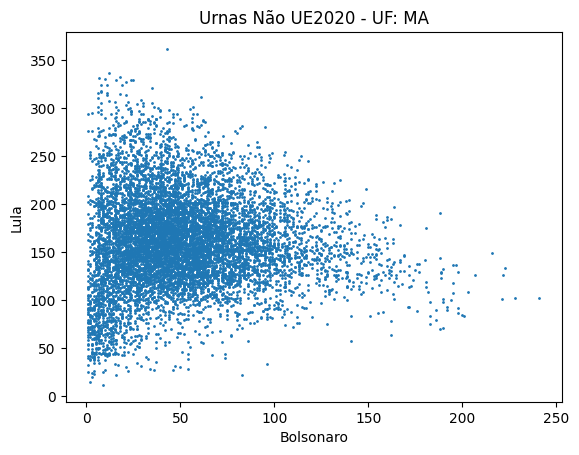

MG


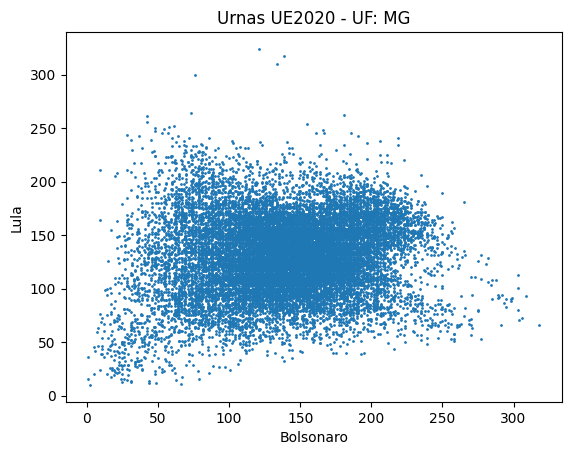

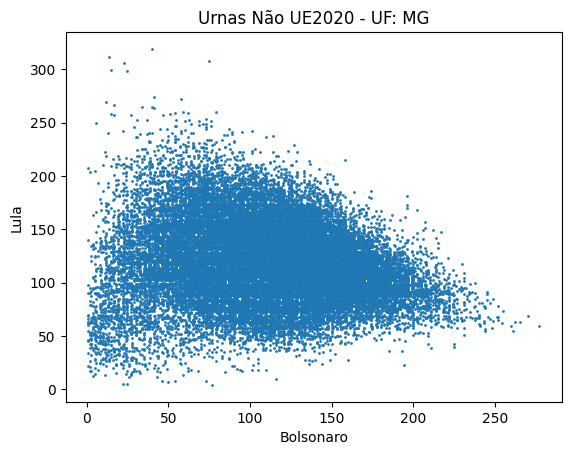

MS


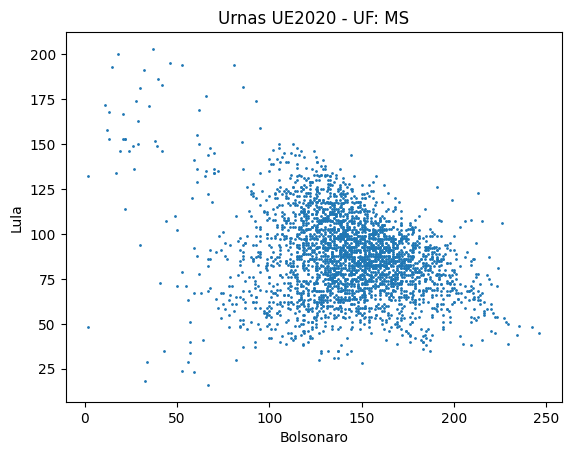

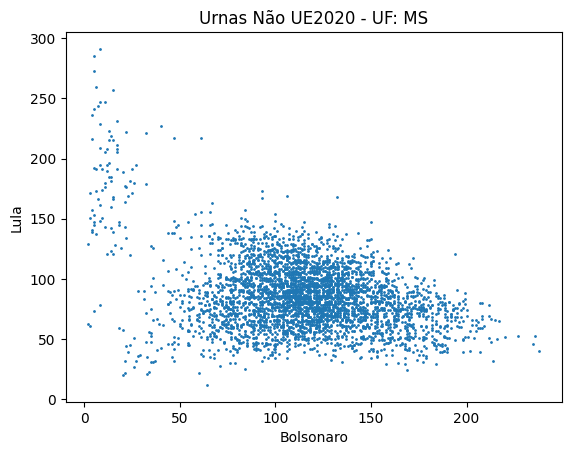

MT


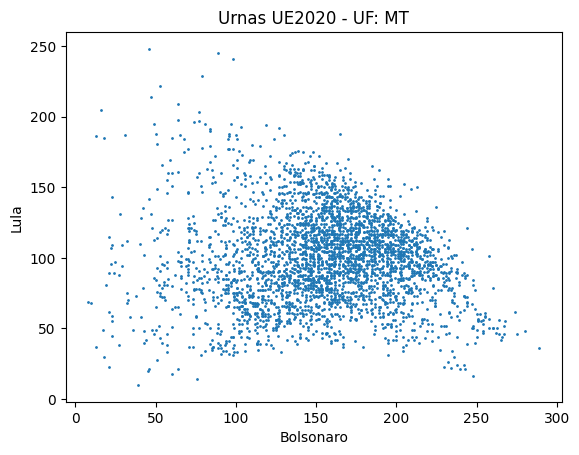

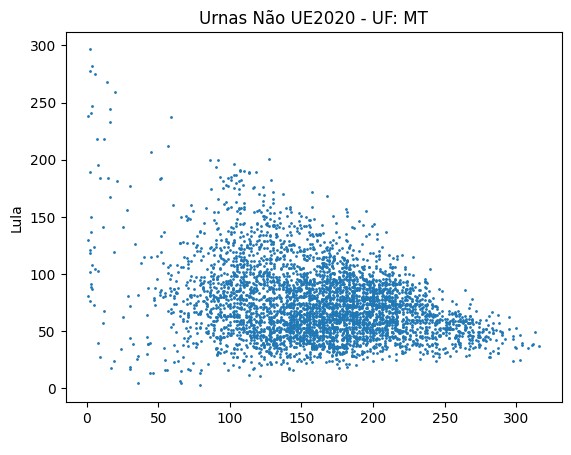

PA


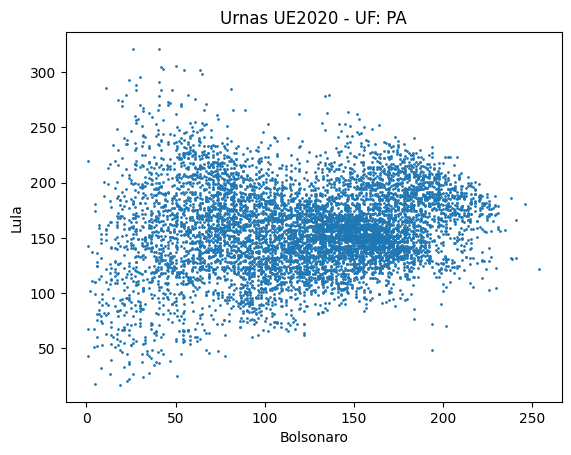

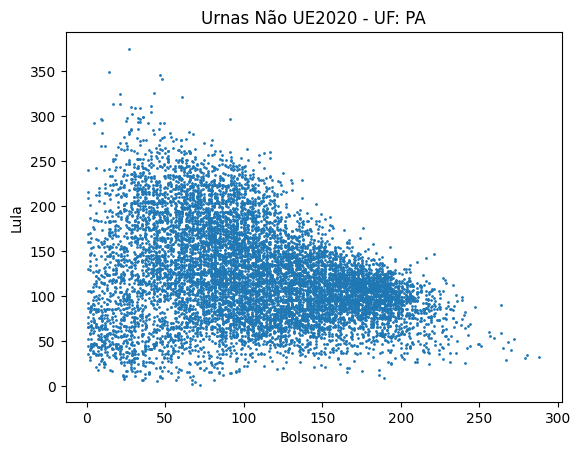

PB


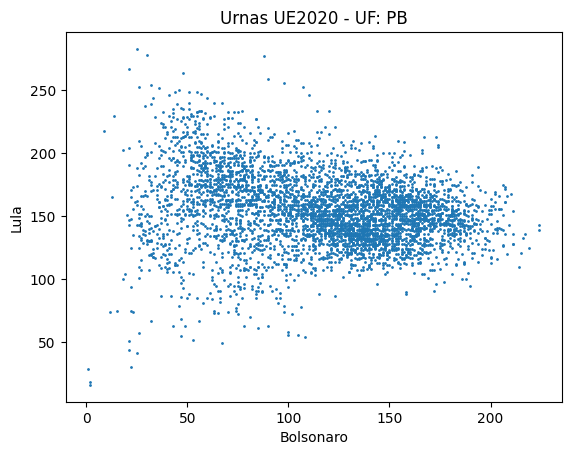

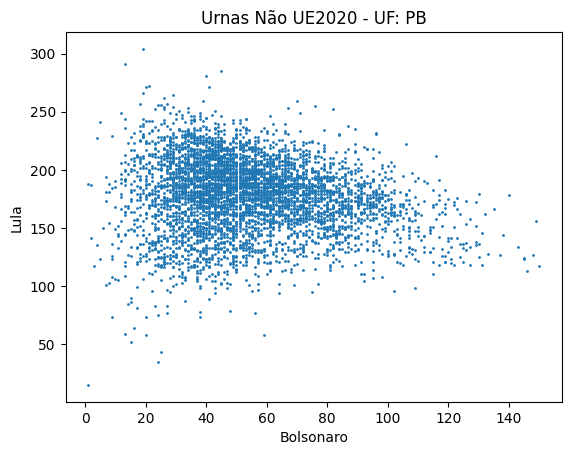

PE


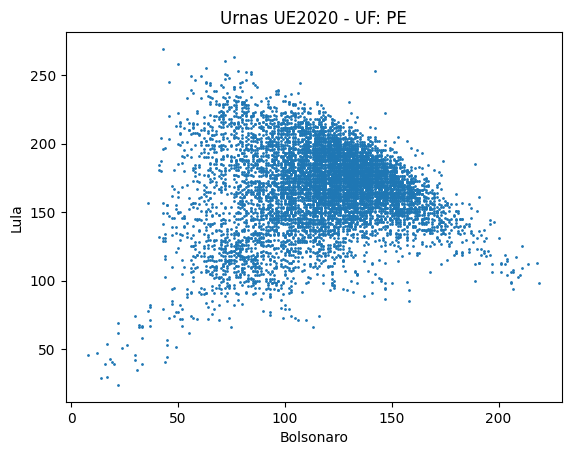

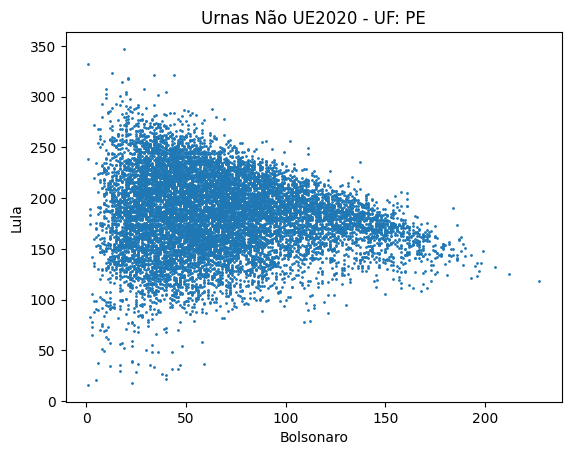

PI


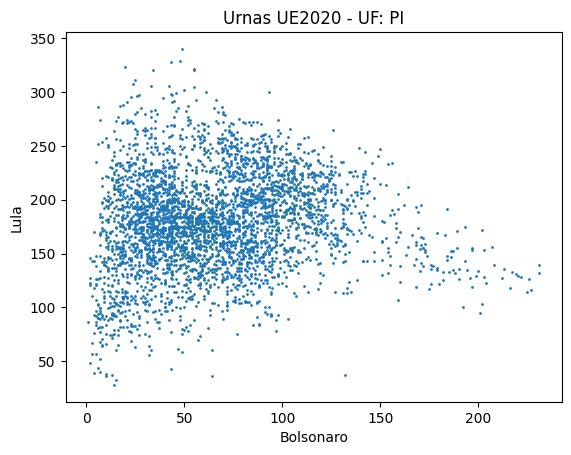

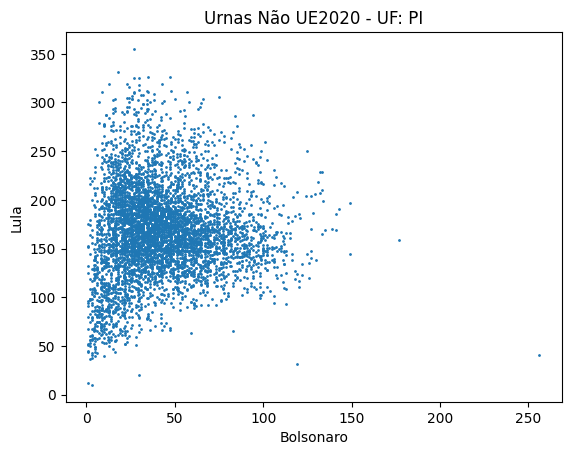

PR


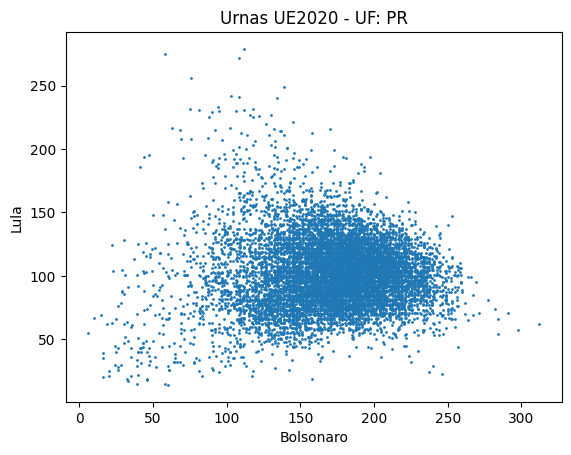

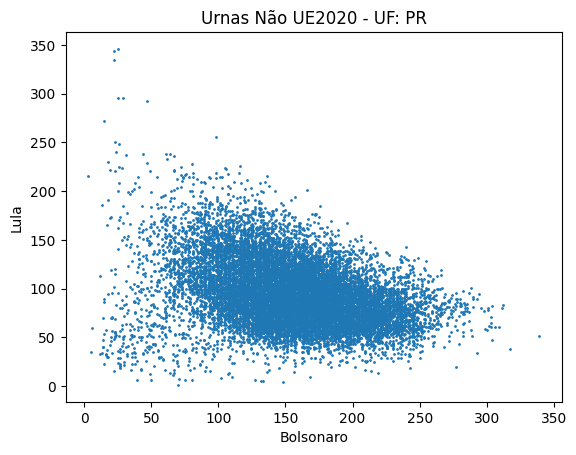

RJ


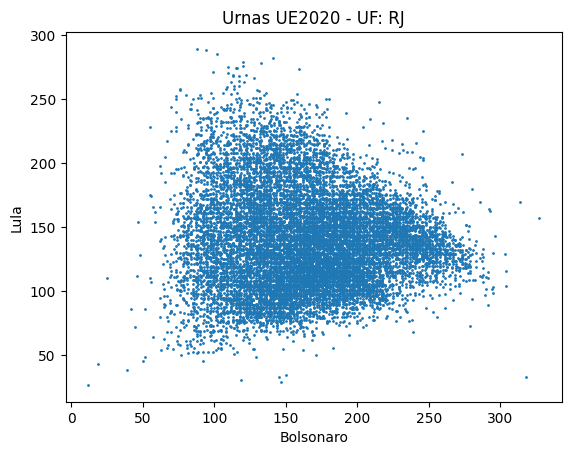

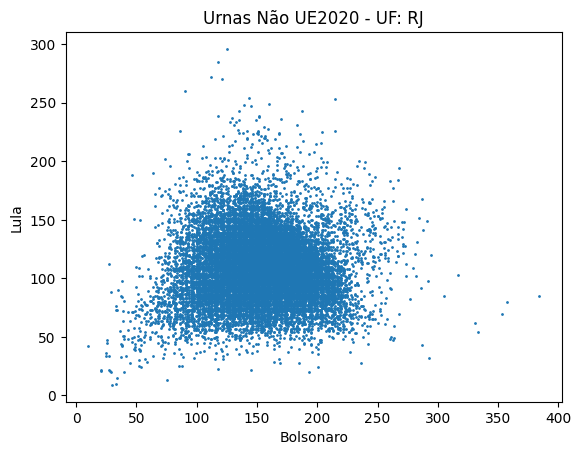

RN


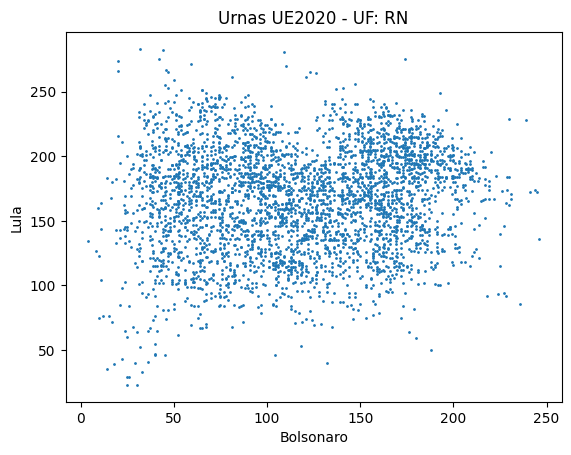

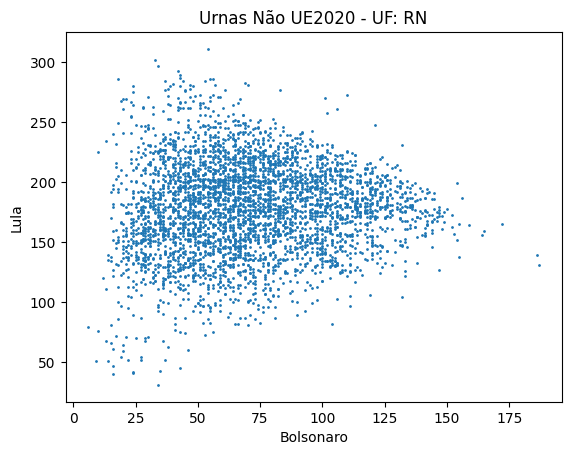

RO


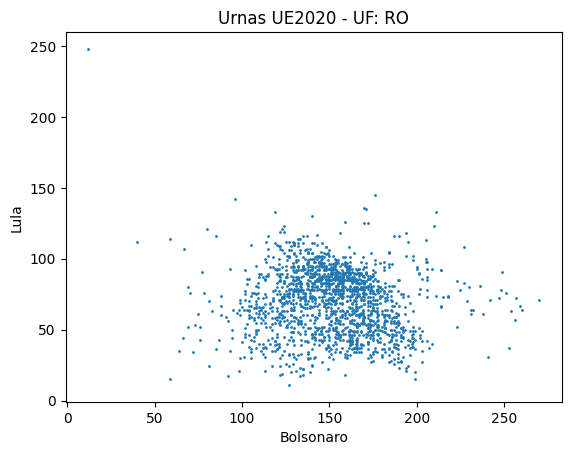

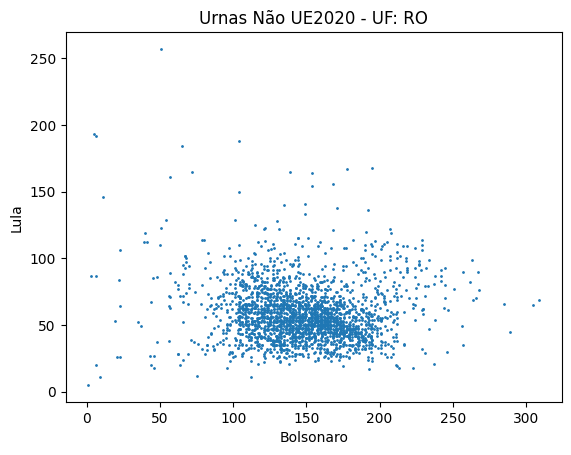

RR


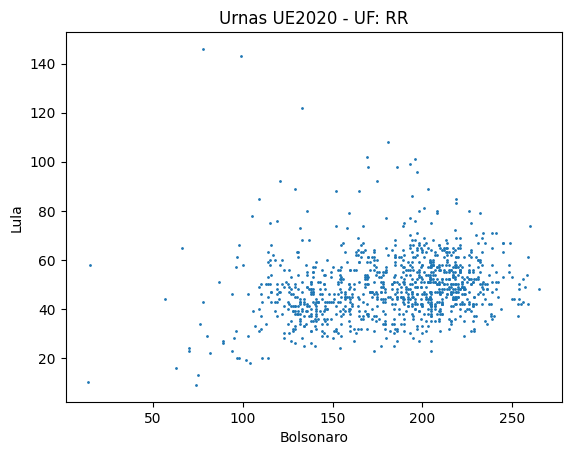

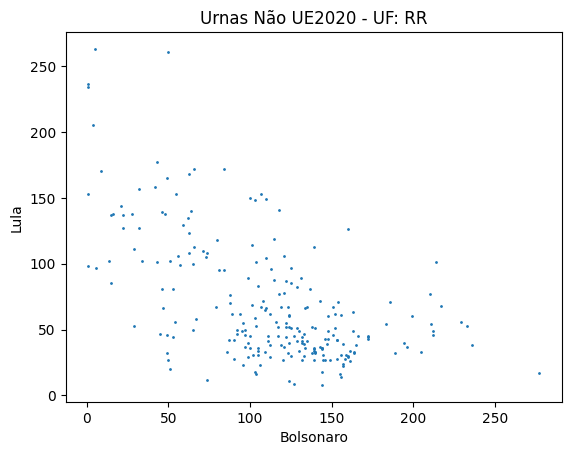

RS


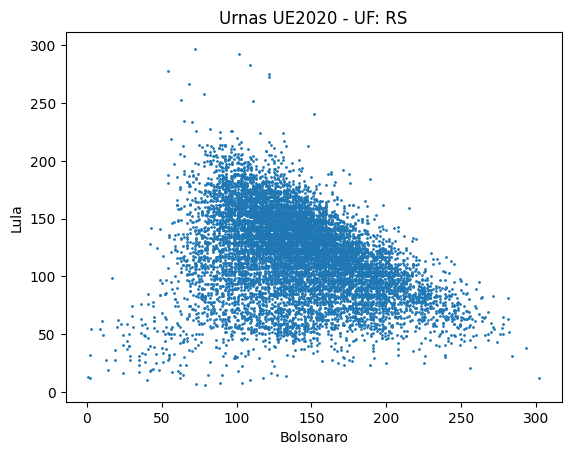

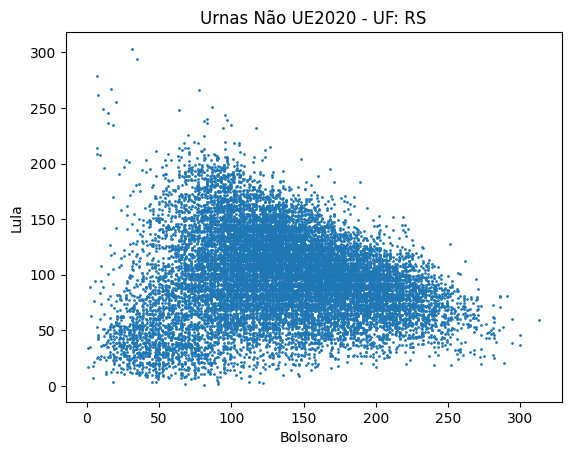

SC


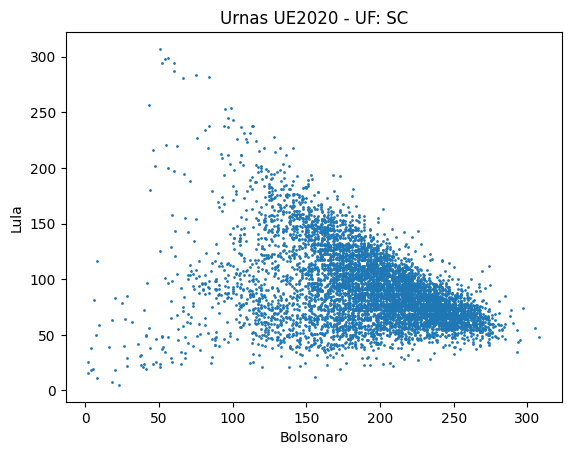

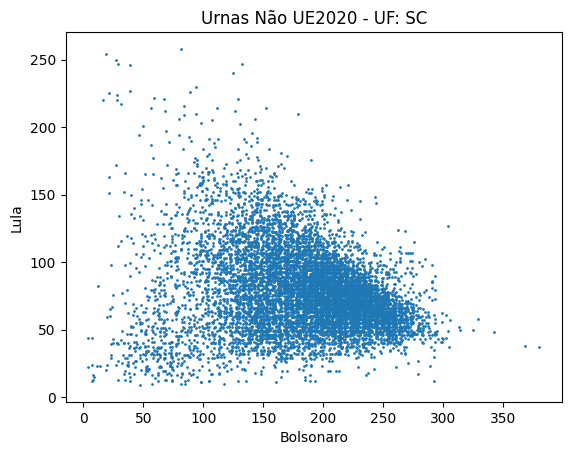

SE


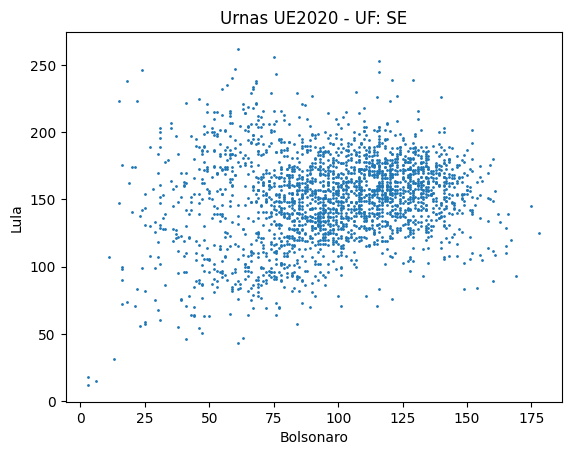

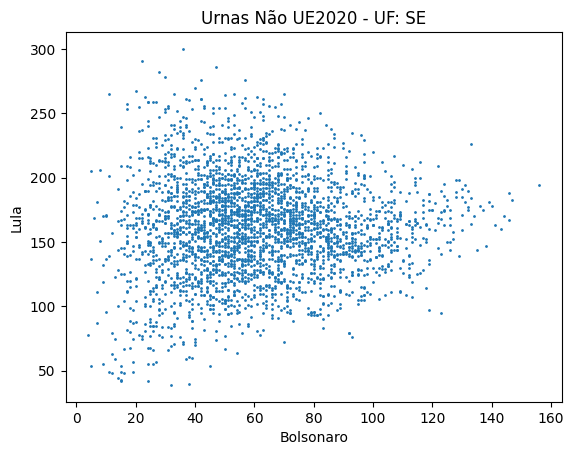

SP


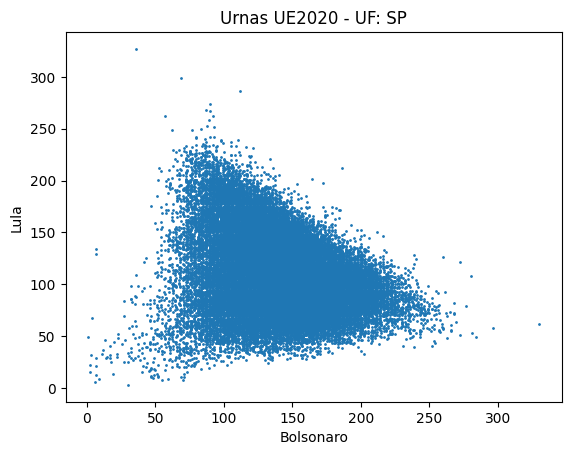

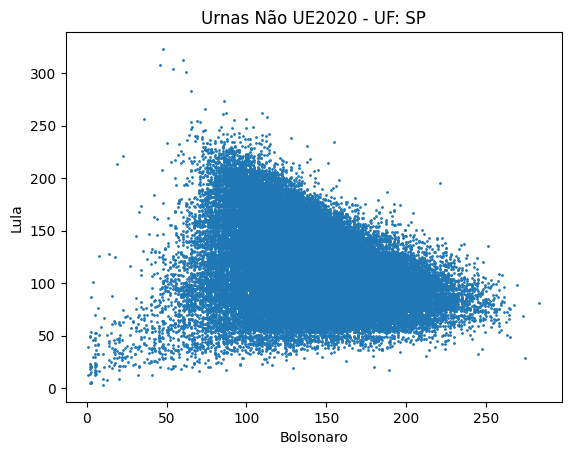

TO


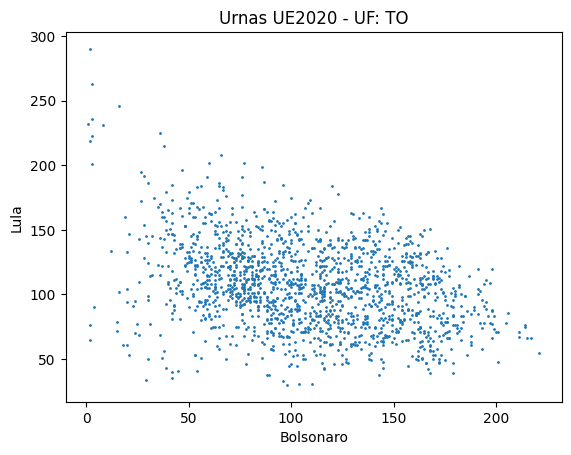

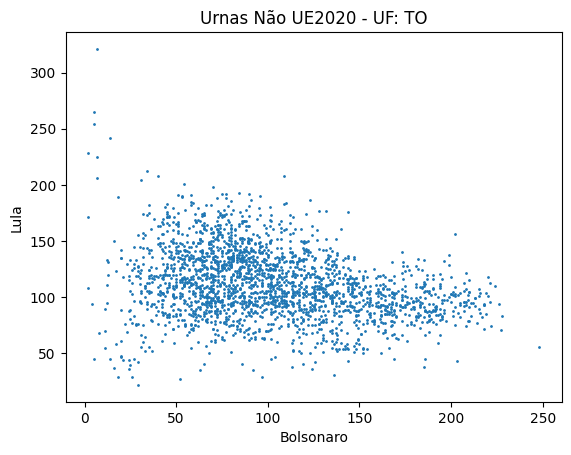

ZZ


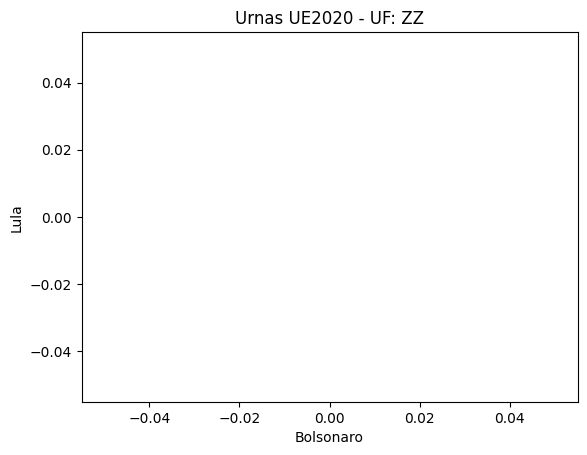

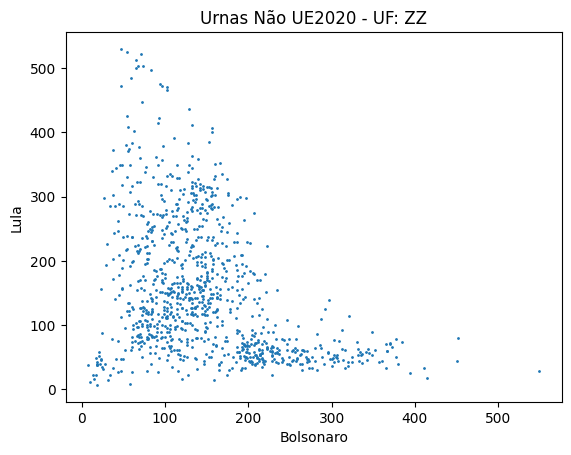

In [18]:
for index, row in votosPresidente.filter(['UF'], axis=1).drop_duplicates().iterrows():
    print(row['UF'])
    data = votosPresidente.query("modelo == 'UE2020' and UF == '"+row['UF']+"'")
    plt.scatter(data['Bolsonaro'],data['Lula'], s=1)
    plt.title("Urnas UE2020 - UF: "+row['UF'])
    plt.xlabel("Bolsonaro")
    plt.ylabel("Lula")
    plt.show()

    data = votosPresidente.query("modelo != 'UE2020' and UF == '"+row['UF']+"'")
    plt.scatter(data['Bolsonaro'],data['Lula'], s=1)
    plt.title("Urnas Não UE2020 - UF: "+row['UF'])
    plt.xlabel("Bolsonaro")
    plt.ylabel("Lula")
    plt.show()

Você pode notar nos gráficos acima o achatamento, que fica sempre mais evidente nos estados onde o PT e Lula são mais populares. Nesses estados o achatamento do triângulo fica muito mais evidente.
<p>Isso demonstra que, se há algorítimo, esse deve ter alguma lógica, não só aleatória, mas também inteligênte para realizar a migração de votos (fraude) levando em consideração a quantidade de votos de cada candidato adversário do número 13 (número do PT)
<p>É muito provável que esse algoritmo estaria presente desde quando as urnas começaram a operar, o que pode ter favorecido o candidato a presidente do PT desde então.
<p>A fraude só poderia então ser detectada porque as UE2020 não apresentaram o mesmo comportamento, ou o algoritmo falhou nessas urnas, criando a oportunidade de comparar os dados, ou <B>não há fraude, e isso seria explicado somente pela existência de urnas com mais concentração de eleitores</B>

Como será que isso pode refletir nos resultados?
<br>Vamos analisar isso visualizando os resultados por UF e por tipo de urna

Text(0.5, 1.0, 'Votos Não UE2020')

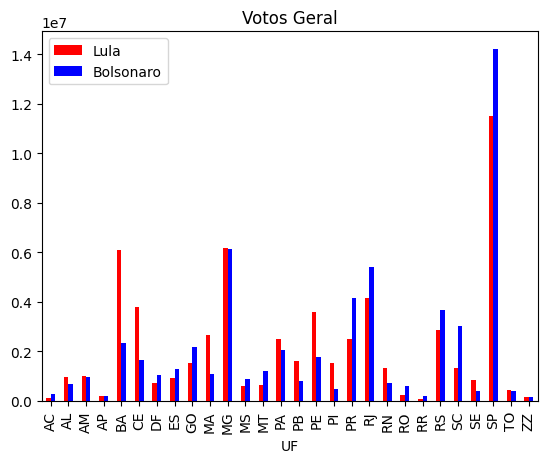

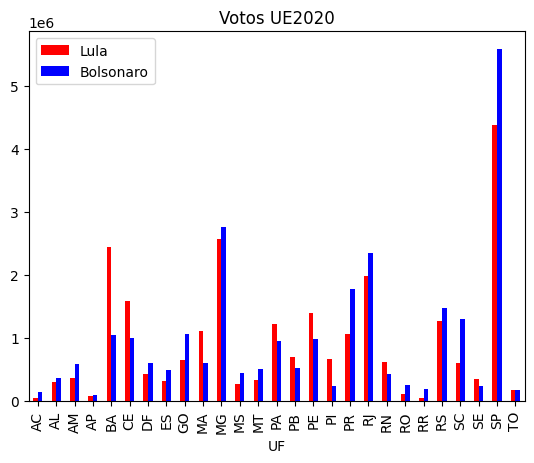

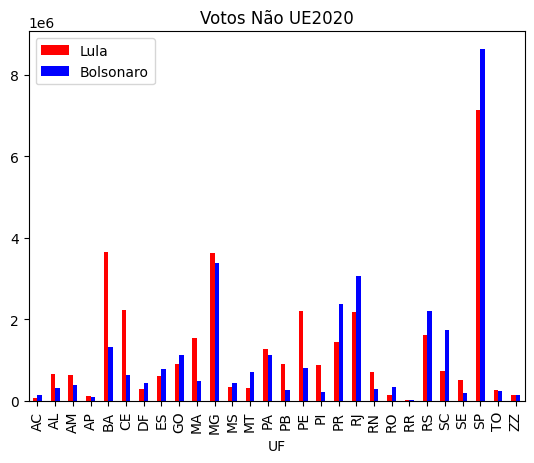

In [19]:
votosPresidente[['UF','Lula','Bolsonaro']].groupby(['UF']).sum(numeric_only=True).plot.bar(color=['red','blue']).set_title("Votos Geral")
votosPresidente.query("modelo == 'UE2020'")[['UF','Lula','Bolsonaro']].groupby(['UF']).sum(numeric_only=True).plot.bar(color=['red','blue']).set_title("Votos UE2020")
votosPresidente.query("modelo != 'UE2020'")[['UF','Lula','Bolsonaro']].groupby(['UF']).sum(numeric_only=True).plot.bar(color=['red','blue']).set_title("Votos Não UE2020")

Text(0.5, 1.0, 'Votos por Tipo de Urna')

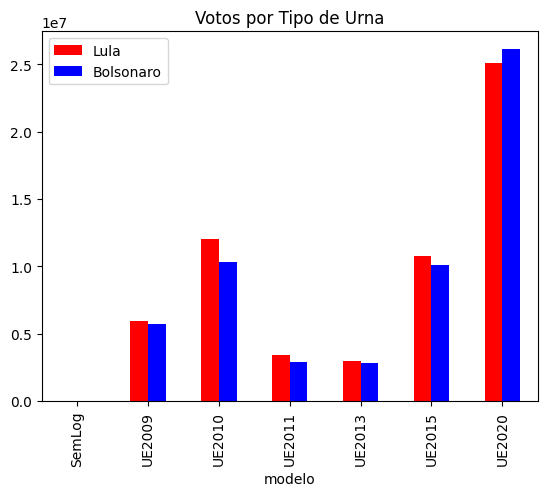

In [20]:
votosPresidente[['UF','modelo','Lula','Bolsonaro']].groupby(['modelo']).sum(numeric_only=True).plot.bar(color=['red','blue']).set_title("Votos por Tipo de Urna")

Tecnicos universitários disseram que as distorções nos gráficos de disperção são devido às urnas UE2020 terem maior quantidade de eleitores.<p>Extraímos as quantidades de eleitores que compareceram por tipo de urna

In [21]:
comparecimento = urnas[['modelo','qtdComparecimento']].query("modelo != 'SemLog'")
comparecimentoGroup = comparecimento.groupby(['modelo']).mean().join(
    comparecimento.groupby(['modelo']).max(), lsuffix='_mean').join(
        comparecimento.groupby(['modelo']).min(), lsuffix='_max').rename(
            {"qtdComparecimento_mean":"média", "qtdComparecimento_max":"max","qtdComparecimento":"min"}, axis=1)
comparecimentoGroup

,média,max,min
modelo,,,
UE2009,252.951269,605,1
UE2010,250.712626,582,7
UE2011,248.430713,485,9
UE2013,248.399319,437,13
UE2015,255.211165,588,8
UE2020,279.468146,508,7


Text(0.5, 1.0, 'Comparecimento por Tipo de Urna')

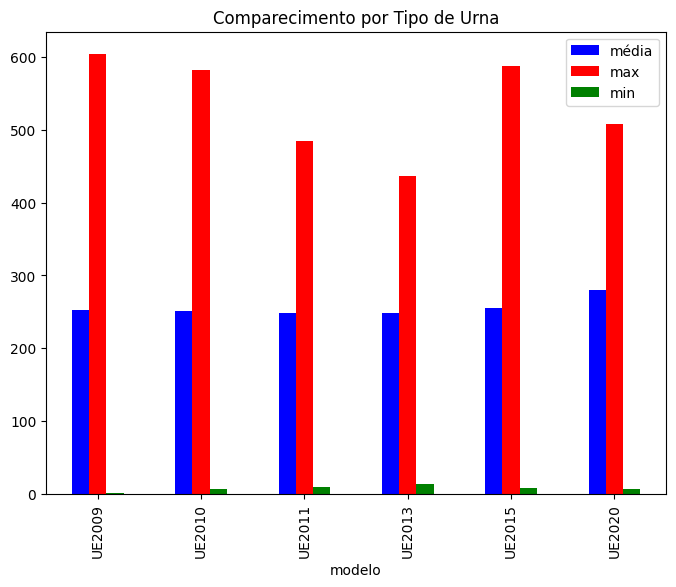

In [25]:
ax = comparecimentoGroup.groupby(['modelo']).sum(numeric_only=True).plot.bar(color=['blue','red','green'], figsize=(8,6))
ax.set_title("Comparecimento por Tipo de Urna")

Vamos criar uma tabela de municipios que tem urna 2020

In [31]:
municipiosUE2020 = votosPresidente.query("modelo == 'UE2020'")[['municipio']].drop_duplicates()

Agora vamos criar uma tabela de votos dos municipios onde haviam urnar UE2020

In [36]:
votosPresidenteMunicipiosComUE2020 = votosPresidente.join(municipiosUE2020.set_index('municipio'), on='municipio', lsuffix='old_', how='inner')

O gráfico abaixo é para verificar e validar o gráfico de dispersão, segundo o fato demográfico. Se for apenas fraude nas urnas antigas, então essas localidades provavelmente apresentariam resultado positivo para o Lula

Text(0.5, 1.0, 'Votos por Tipo de Urna Cidades com UE2020')

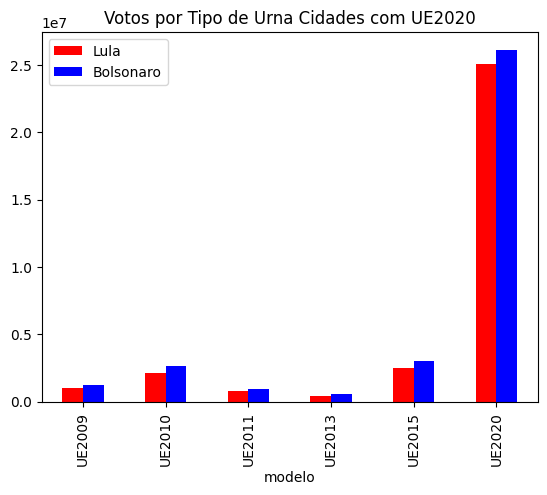

In [40]:
votosPresidenteMunicipiosComUE2020[['UF','modelo','Lula','Bolsonaro']].groupby(['modelo']).sum(numeric_only=True).plot.bar(color=['red','blue']).set_title("Votos por Tipo de Urna Cidades com UE2020")

Conforme o gráfico acima, fica demonstrado que, muito provavelmente, não há o tal comportamento distinto para as UE2020, já que nas localidades onde há urnas 2020 também o Bolsonaro ganha. Sendo assim, fico muito convencido que o gráfico de dispersão, apesar de aparentar algo curioso, foi somente um erro de interpretação, além do que, o que compentei na primeira apresentação (no youtube) sobre fatores demográficos desconhecidos, ficam assim comprovados.

Isso também foi apontado por especialistas de universidades que mapearam a localização das urnas.